In [2]:
import requests
import os
import csv

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P708"  

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        list: List of plant configurations.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Function to save configurations to a CSV file
def save_configurations_to_csv(plant_code, configurations):
    """
    Saves the plant configurations to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        configurations (list): List of plant configurations.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_configurations.csv")

    # Write configurations to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["Version", "Valid From", "Other Details"])  # Adjust headers as needed
        # Write the data
        for config in configurations:
            version = config.get("v", "N/A")
            ts_valid = config.get("t", "N/A")
            other_details = config.get("other_details", "N/A")  # Replace with actual keys if needed
            writer.writerow([version, ts_valid, other_details])

    print(f"Configurations saved to: {csv_file_path}")

# Function to print configurations nicely
def print_configurations(configurations):
    """
    Prints the plant configurations nicely on the screen.

    Args:
        configurations (list): List of plant configurations.
    """
    print("\nPlant Configurations:")
    for config in configurations:
        version = config.get("v", "N/A")
        ts_valid = config.get("t", "N/A")
        other_details = config.get("other_details", "N/A")  # Replace with actual keys if needed
        print(f"Version: {version}")
        print(f"Valid From: {ts_valid}")
        print(f"Other Details: {other_details}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print configurations nicely
    print_configurations(configurations)

    # Save configurations to CSV
    save_configurations_to_csv(PLANT_CODE, configurations)
except Exception as e:
    print("Error:", e)


Plant Configurations:
Version: 1
Valid From: 2016-11-17 17:40:23
Other Details: N/A
----------------------------------------
Version: 2
Valid From: 2017-11-06 12:37:35
Other Details: N/A
----------------------------------------
Version: 3
Valid From: 2019-12-31 23:00:00
Other Details: N/A
----------------------------------------
Version: 4
Valid From: 2020-06-30 22:00:00
Other Details: N/A
----------------------------------------
Configurations saved to: Data/P708/P708_configurations.csv


In [3]:
import requests
import os
import csv

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P708"  # Replace with your plant code

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

def get_blocks(plant_code, config_version, block_types=None):
    """
    Retrieves a list of blocks (devices) from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        block_types (str or list, optional): Type(s) of blocks to filter (e.g., "INVERTER" or ["COUNTER", "INVERTER"]).

    Returns:
        list: Array of block objects representing devices in the plant.
    """
    url = f"{BASE_URL}/{plant_code}/blocks/{config_version}"
    params = {}
    if block_types:
        params["type"] = block_types if isinstance(block_types, str) else ",".join(block_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve blocks: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_blocks_to_csv(plant_code, blocks):
    """
    Saves the blocks to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        blocks (list): List of block objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_blocks.csv")

    # Write blocks to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Sensors", "Visible", "Enabled"])
        # Write the data
        for block in blocks:
            writer.writerow([
                block.get("id", "N/A"),
                block.get("name", "N/A"),
                block.get("type", "N/A"),
                block.get("desc", "N/A"),
                block.get("oid", "N/A"),
                block.get("props", "N/A"),
                block.get("sens", "N/A"),
                block.get("visible", "N/A"),
                block.get("enabled", "N/A")
            ])

    print(f"Blocks saved to: {csv_file_path}")

def print_blocks(blocks):
    """
    Prints the blocks nicely on the screen.

    Args:
        blocks (list): List of block objects.
    """
    print("\nBlocks List:")
    for block in blocks:
        print(f"ID: {block.get('id', 'N/A')}")
        print(f"Name: {block.get('name', 'N/A')}")
        print(f"Type: {block.get('type', 'N/A')}")
        print(f"Description: {block.get('desc', 'N/A')}")
        print(f"OID: {block.get('oid', 'N/A')}")
        print(f"Properties: {block.get('props', 'N/A')}")
        print(f"Sensors: {block.get('sens', 'N/A')}")
        print(f"Visible: {block.get('visible', 'N/A')}")
        print(f"Enabled: {block.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = 4       # Configuration version
    block_types = None       # Retrieve all block types

    # Retrieve blocks
    blocks = get_blocks(plant_code, config_version, block_types)

    # Print blocks nicely
    print_blocks(blocks)

    # Save blocks to CSV
    save_blocks_to_csv(plant_code, blocks)
except Exception as e:
    print("Error:", e)


Blocks List:
ID: 1
Name: P708
Type: PLANT
Description: Consegna
OID: 1
Properties: {'alarm_irradiance_threshold': '100', 'capacity': '998.58', 'energy_alerts': '0', 'field_alarm_ttl': '30', 'field_data_ttl': '15', 'irr_link.0': '25', 'temp_link.0': '41'}
Sensors: ['J1', 'J31', 'J44', 'J4', 'J104', 'J102', 'J7', 'J34', 'J101', 'J30', 'J33']
Visible: True
Enabled: True
----------------------------------------
ID: 32
Name: Inverter
Type: AGGREGATE
Description: Inverter
OID: 1.1
Properties: {'aggr_stop': '1', 'alarm_irradiance_filter': '', 'capacity': '998.58', 'irr_link.0': '25', 'temp_link.0': '41'}
Sensors: ['A32#1', 'A32#4', 'A32#8', 'A32#9', 'A32#23', 'A32#31', 'A32#44', 'A32#75']
Visible: True
Enabled: True
----------------------------------------
ID: 103
Name: Inverter 01
Type: INVERTER
Description: Inverter Sunway TG
OID: 1.1.1
Properties: {'aggr_stop': '0', 'alarm_irradiance_filter': '0', 'capacity': '510.51', 'com_fail_alarm': '99', 'device_timeout': '', 'hw_address': '1', 'inve

In [4]:
import requests
import os
import csv

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P708"  # Replace with your plant code

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = 4       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)

    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)


Sensors List:
ID: 10
Name: Energy AC
Type: AC_ACTIVE_ENERGY
Description: 
OID: 1.2:10
Properties: {'cast': 'U32', 'eh_link': 'D.10.EH', 'endian': 'BE SWAP 8', 'energy_heuristic': '1', 'energy_link': 'D.10.DELTA', 'is_raw': '1', 'register': '30067F', 'sampling_period': '300', 'sun_filter': '0'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 11
Name: Grid Frequency
Type: GRID_FREQUENCY
Description: 
OID: 1.1.1:11
Properties: {'alarm_c': '10', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'S16', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '300673', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 12
Name: Shutdown Grid Counter
Type: STATUS
Description: 
OID: 1.1.1:12
Properties: {'alarm_debounce': '60', 'alarm_function': '', 'alarm_m

In [5]:
# import requests
# import pandas as pd
# import time
# from datetime import datetime, timedelta

# # API endpoint and authentication details
# plant_code = "P708"  # Replace with your plant code
# trend_url = f"https://renforce.esapro.it/api/{plant_code}/data/trend"
# sensors_url = f"https://renforce.esapro.it/api/{plant_code}/sensors/3"
# headers = {
#     "X-API-Token": "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"
# }

# # Fetch the list of all available sensors
# response_sensors = requests.get(sensors_url, headers=headers)
# if response_sensors.status_code == 200:
#     sensors_data = response_sensors.json()
#     all_sensors = [sensor['id'] for sensor in sensors_data]  # Extract all sensor IDs
#     print(f"Total sensors fetched: {len(all_sensors)}")
# else:
#     raise Exception(f"Failed to fetch sensors. HTTP Status Code: {response_sensors.status_code}")

# # Split sensors into batches of 25 (API limit)
# batch_size = 25
# sensor_batches = [all_sensors[i:i + batch_size] for i in range(0, len(all_sensors), batch_size)]

# # Define the start year and dynamically set the end date to yesterday
# start_year = 2017
# end_date = (datetime.today() - timedelta(days=1)).replace(hour=23, minute=59, second=59, microsecond=0)
# end_year = end_date.year
# print(f"Processing data from {start_year} to {end_year} (end date: {end_date})")

# # Initialize a dictionary to store the results
# missing_data_summary = {}
# sensors_with_data_summary = {}  # To store sensors with data for each year

# # Loop through each year
# for year in range(start_year, end_year + 1):
#     print(f"Processing year: {year}")
#     # Define the start and end timestamps for the year
#     start_time = datetime(year, 1, 1, 0, 0, 0)
#     end_time = datetime(year, 12, 31, 23, 59, 59) if year < end_year else end_date

#     # Initialize a DataFrame to store data for the year
#     yearly_data = pd.DataFrame()

#     # Loop through each batch of sensors
#     for batch in sensor_batches:
#         # Prepare the payload for the API request
#         payload = {
#             "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
#             "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
#             "sensors": batch,
#             "resolution": 1  # Hourly resolution
#         }

#         # Make the API call
#         response = requests.post(trend_url, headers=headers, json=payload)

#         if response.status_code == 200:
#             # Parse the JSON response
#             data = response.json()

#             # Transform the data into a DataFrame
#             for sensor_id, sensor_data in data.items():
#                 if not sensor_data:
#                     continue
#                 sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", sensor_id])
#                 sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
#                 sensor_df.set_index("timestamp", inplace=True)  # Set timestamp as index

#                 # Merge the sensor data into the yearly DataFrame
#                 if yearly_data.empty:
#                     yearly_data = sensor_df
#                 else:
#                     yearly_data = pd.merge(yearly_data, sensor_df, left_index=True, right_index=True, how="outer")

#             print(f"Data for year {year}, sensors {batch[:5]}... fetched successfully.")
#         else:
#             print(f"Failed to fetch data for year {year}, sensors {batch[:5]}. HTTP Status Code: {response.status_code}")
#             print("Response:", response.text)

#         # Respect the API rate limit (no more than 5 calls per minute)
#         time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

#     # Remove columns with no data
#     if not yearly_data.empty:
#         yearly_data = yearly_data.dropna(axis=1, how="all")  # Drop columns where all values are NaN

#     # Commented out: Save the yearly data to a CSV file
#     # if not yearly_data.empty:
#     #     file_name = f"Data/{plant_code}/data_{year}.csv"
#     #     yearly_data.to_csv(file_name)
#     #     print(f"Data for year {year} saved to {file_name}")
#     # else:
#     #     print(f"No data available for year {year}.")

#     # Calculate the percentage of missing data for each sensor
#     missing_percentage = yearly_data.isna().mean() * 100

#     # Store the results in the dictionary
#     missing_data_summary[year] = missing_percentage

#     # Identify sensors with data for the year
#     sensors_with_data = [sensor for sensor in yearly_data.columns if not yearly_data[sensor].isna().all()]
#     sensors_with_data_summary[year] = sensors_with_data
#     print(f"Year {year}: {len(sensors_with_data)}/{len(all_sensors)} sensors with data: {sensors_with_data}")

# # Convert the results to a DataFrame for better visualization
# missing_data_summary_df = pd.DataFrame(missing_data_summary)

# # Display the missing data summary
# print("Percentage of Missing Data by Year:")
# print(missing_data_summary_df)

# # Calculate the average percentage of missing data per year
# average_missing_per_year = missing_data_summary_df.mean(axis=0)

# # Convert the result to a DataFrame for better visualization
# average_missing_per_year_df = average_missing_per_year.reset_index()
# average_missing_per_year_df.columns = ["Year", "Average Missing Data (%)"]

# # Display the average missing data per year
# print("\nAverage Percentage of Missing Data Per Year:")
# print(average_missing_per_year_df)

# # Display sensors with data for each year
# print("\nSensors with Data by Year:")
# for year, sensors in sensors_with_data_summary.items():
#     print(f"Year {year}: {len(sensors)}/{len(all_sensors)} sensors with data: {sensors}")

Analysis on the P708 from 10 - 14.05.2025 on 15 minute resolutions

In [ ]:
import requests
import pandas as pd
import time
import os

# API endpoint URLs
trend_url = "https://renforce.esapro.it/api/P708/data/trend/"
sensors_url = "https://renforce.esapro.it/api/P708/sensors/3"

# Authentication headers
headers = {
    "X-API-Token": "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"
}

# Function to save sensors with data (ID and Name) to a CSV file
def save_sensors_with_data(plant_code, sensors_with_data, sensors_metadata):
    """
    Saves the list of sensors with data (ID and Name) to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors_with_data (list): List of sensor IDs with data.
        sensors_metadata (pd.DataFrame): DataFrame containing sensor metadata.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors_with_data.csv")

    # Filter metadata to include only sensors with data
    matching_sensors = sensors_metadata[sensors_metadata["id"].isin(sensors_with_data)]  # Use "id" instead of "ID"

    # Save the matching sensors (ID and Name) to the CSV file
    matching_sensors[["id", "name"]].to_csv(csv_file_path, index=False)  # Use "id" and "name" columns

    print(f"Sensors with data saved to: {csv_file_path}")

# Fetch the list of sensors
response_sensors = requests.get(sensors_url, headers=headers)

if response_sensors.status_code == 200:
    # Parse the JSON response to get the list of sensors
    sensors_data = response_sensors.json()
    sensors_metadata = pd.DataFrame(sensors_data)  # Convert sensor metadata to a DataFrame
    sensor_ids = sensors_metadata["id"].tolist()  # Get all sensor IDs
    print(f"Total sensor IDs: {len(sensor_ids)}")
    
    # Define time range for one week on an hourly basis
    payload_template = {
        "from": "2025-04-15 00:00:00",  # Start date and time
        "to": "2025-05-15 23:59:59",    # End date and time
        "resolution": 0                 # Hourly resolution
    }

    # Split sensor IDs into batches of 25 sensors per batch
    batch_size = 25
    sensor_batches = [sensor_ids[i:i + batch_size] for i in range(0, len(sensor_ids), batch_size)]

    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # List to track sensors with data
    sensors_with_data = []

    # Loop through each batch and make API calls
    for batch_idx, batch in enumerate(sensor_batches):
        print(f"Processing batch {batch_idx + 1} with sensors: {batch}")
        payload = payload_template.copy()
        payload["sensors"] = batch  # Add the current batch of sensors to the payload

        # Make the POST request to the API
        response = requests.post(trend_url, headers=headers, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Track sensors with no data
            no_data_sensors = []

            # Transform the data into a DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    no_data_sensors.append(sensor_id)  # Log sensors with no data
                    continue
                sensors_with_data.append(sensor_id)  # Add sensor to the list of sensors with data
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", sensor_id])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                if df.empty:
                    df = sensor_df
                else:
                    df = pd.merge(df, sensor_df, on="timestamp", how="outer")  # Merge on timestamp

            # Log sensors with no data for this batch
            if no_data_sensors:
                print(f"No data returned for sensors in batch {batch_idx + 1}: {', '.join(map(str, no_data_sensors))}")
            else:
                print(f"All sensors in batch {batch_idx + 1} have data.")
        else:
            print(f"Failed to fetch trend data for batch {batch_idx + 1}. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    # Remove duplicates from the list of sensors with data
    sensors_with_data = list(set(sensors_with_data))

    # Set the timestamp as the index
    if not df.empty:D
        df.set_index("timestamp", inplace=True)

    # Display the DataFrame
    print("DataFrame:")
    print(df.head())
    
    # Display the list of sensors with data
    print("\nSensors with data:")
    print(sensors_with_data)
    print(f"Total sensors with data: {len(sensors_with_data)}")
    
    # Save the list of sensors with data (ID and Name) to a CSV file
    save_sensors_with_data("P708", sensors_with_data, sensors_metadata)

    # Calculate and display the number of missing values
    if not df.empty:
        missing_values = df.isna().sum().sum()
        print(f"Total missing values in the DataFrame: {missing_values}")
else:
    print(f"Failed to fetch sensors. HTTP Status Code: {response_sensors.status_code}")
    print("Response:", response_sensors.text)

Total sensor IDs: 51
Processing batch 1 with sensors: ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '29', '3', '30', '31', '32', '33', '34', '35']
No data returned for sensors in batch 1: 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 29, 3, 30, 31, 32, 33, 34, 35
Processing batch 2 with sensors: ['36', '37', '38', '4', '40', '41', '42', '43', '44', '5', '6', '7', '8', '9', 'D.10.DELTA', 'D.10.EH', 'D.17.PERC', 'D.21.DELTA', 'D.21.EH', 'D.25.ISIRR', 'D.25.STDDEV', 'D.6.PERC', 'V45', 'V46', 'V47']
No data returned for sensors in batch 2: 36, 4, 42, 43, 44, 5, 7, 8, 9
Processing batch 3 with sensors: ['V48']
All sensors in batch 3 have data.
DataFrame:
                            10   17         21     25      26    40   41    6  \
timestamp                                                                       
2025-02-15 00:00:00  4735099.5  0.0  5110424.0  2.857  10.800  16.1  4.6  0.0   
2025-02-15 00:15:00  4735099.5  0.0  511

The api call on 15-minute resolution returns an extra reading for sensor 25 (Irraggiamento Piano Moduli) which the one on hourly basis does not. This sensor is important as translates to "Irradiance on the Module Plane" in English. It refers to the amount of solar radiation (irradiance) received by the surface of photovoltaic (PV) modules or solar panels. This is a critical parameter in solar energy systems as it directly impacts the energy production of the solar panels.

In [7]:
import pandas as pd

# Load the CSV file containing sensor metadata
sensors_metadata = pd.read_csv("/Users/rafaelcrismar/P708/Data/P708/P708_sensors.csv")

# Filter the metadata to include only the ID and Name columns
sensors_metadata_filtered = sensors_metadata[["Name","ID"]]

# Ensure the IDs in the DataFrame match the IDs in the metadata
if not df.empty:
    # Get the IDs from the DataFrame columns (excluding the timestamp index)
    df_sensor_ids = df.columns.tolist()

    # Filter the metadata to include only the sensors present in the DataFrame
    matching_sensors = sensors_metadata_filtered[sensors_metadata_filtered["ID"].isin(df_sensor_ids)]

    print(matching_sensors.to_string(index=False))
else:
    print("The DataFrame is empty. No sensors to match.")

                             Name          ID
                        Energy AC          10
                  Active Power AC          17
                        Energy AC          21
       Irraggiamento Piano Moduli          25
             Temperatura Ambiente          26
      Temperatura Locale Inverter          40
               Temperatura Moduli          41
                  Active Power AC           6
                  Energy AC DELTA  D.10.DELTA
      Ore equivalenti (Energy AC)     D.10.EH
                Active Power AC %   D.17.PERC
                  Energy AC DELTA  D.21.DELTA
      Ore equivalenti (Energy AC)     D.21.EH
 Irraggiamento Piano Moduli ISIRR  D.25.ISIRR
Irraggiamento Piano Moduli STDDEV D.25.STDDEV
                Active Power AC %    D.6.PERC
                Performance Ratio         V45
                Performance Ratio         V46
                Expected Power AC         V47
                Expected Power AC         V48


In [8]:
# Function to save the full DataFrame to a CSV file
def save_full_data(plant_code, df):
    """
    Saves the full DataFrame to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        df (pd.DataFrame): The DataFrame containing the full data.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, "full_data_plant.csv")

    # Save the DataFrame to the CSV file
    df.to_csv(csv_file_path, index=True, encoding="utf-8")

    print(f"Full data saved to: {csv_file_path}")
3
# Save the full DataFrame to a file
if not df.empty:
    save_full_data("P708", df)
else:
    print("The DataFrame is empty. No data to save.")

Full data saved to: Data/P708/full_data_plant.csv


In [9]:
df[["41"]]

,41
timestamp,
2025-02-15 00:00:00,4.600
2025-02-15 00:15:00,4.600
2025-02-15 00:30:00,4.600
2025-02-15 00:45:00,4.600
2025-02-15 01:00:00,4.600
...,...
2025-05-15 22:45:00,7.767
2025-05-15 23:00:00,7.600
2025-05-15 23:15:00,7.533


After multiple experiments I made a discovery that the data received from the API and the one on the website is delayed by 3 hours. 

For example out record 2025-05-10 00:00:00 4.100 is equivalent with the record 2025-05-10 03:00:00 from the website, and the trend follows. In order to fix this I will shift the data in the df to correspond.
We need to figure out which one is the correct reading.

In [10]:
import os

# Shift all data 12 records down
shifted_df = df.shift(periods=12, axis=0)
shifted_df = shifted_df.iloc[12:]
# Define the directory and file path
base_dir = "Data"
plant_code = "P708"
plant_dir = os.path.join(base_dir, plant_code)
csv_file_path = os.path.join(plant_dir, "full_data_plant.csv")  # Same file name as before

# Save the shifted DataFrame to the same file, overwriting the previous one
os.makedirs(plant_dir, exist_ok=True)  # Ensure the directory exists
shifted_df.to_csv(csv_file_path, index=True, encoding="utf-8")

print(f"All data has been shifted 12 records down and saved to '{csv_file_path}'.")

All data has been shifted 12 records down and saved to 'Data/P708/full_data_plant.csv'.


In [11]:
import pandas as pd

# Define the file path
csv_file_path = "Data/P708/full_data_plant.csv"

# Read the DataFrame from the file
df = pd.read_csv(csv_file_path, index_col=0, parse_dates=True)

# Display the first few rows to confirm
print(df.head())

                            10   17         21     25      26    40   41    6  \
timestamp                                                                       
2025-02-15 03:00:00  4735099.5  0.0  5110424.0  2.857  10.800  16.1  4.6  0.0   
2025-02-15 03:15:00  4735099.5  0.0  5110424.0  2.857  10.233  16.1  4.6  0.0   
2025-02-15 03:30:00  4735099.5  0.0  5110424.0  2.857  10.667  16.1  4.6  0.0   
2025-02-15 03:45:00  4735099.5  0.0  5110424.0  2.738  10.300  16.1  4.6  0.0   
2025-02-15 04:00:00  4735099.5  0.0  5110424.0  2.679   9.900  16.1  4.6  0.0   

                     D.10.DELTA  D.10.EH  D.17.PERC  D.21.DELTA  D.21.EH  \
timestamp                                                                  
2025-02-15 03:00:00         0.0      NaN        0.0         0.0      NaN   
2025-02-15 03:15:00         0.0      NaN        0.0         0.0      NaN   
2025-02-15 03:30:00         0.0      NaN        0.0         0.0      NaN   
2025-02-15 03:45:00         0.0      NaN        0.0 

In [12]:
df.columns

Index(['10', '17', '21', '25', '26', '40', '41', '6', 'D.10.DELTA', 'D.10.EH',
       'D.17.PERC', 'D.21.DELTA', 'D.21.EH', 'D.25.ISIRR', 'D.25.STDDEV',
       'D.6.PERC', 'V45', 'V46', 'V47', 'V48'],
      dtype='object')

In [13]:
# Load the sensor names from the saved CSV file
sensor_data = pd.read_csv("Data/P708/P708_sensors_with_data.csv")

# Filter the sensor data to include only the sensors present in the DataFrame
sensors_in_df = sensor_data[sensor_data['id'].astype(str).isin(df.columns)]

# Display the sensor names present in the DataFrame
print("Sensors present in the DataFrame:")
for _, row in sensors_in_df.iterrows():
    print(f"Sensor ID: {row['id']}, Name: {row['name']}")

Sensors present in the DataFrame:
Sensor ID: 10, Name: Energy AC
Sensor ID: 17, Name: Active Power AC
Sensor ID: 21, Name: Energy AC
Sensor ID: 25, Name: Irraggiamento Piano Moduli
Sensor ID: 26, Name: Temperatura Ambiente
Sensor ID: 40, Name: Temperatura Locale Inverter
Sensor ID: 41, Name: Temperatura Moduli
Sensor ID: 6, Name: Active Power AC
Sensor ID: D.10.DELTA, Name: Energy AC DELTA
Sensor ID: D.10.EH, Name: Ore equivalenti (da Energy AC)
Sensor ID: D.17.PERC, Name: Active Power AC %
Sensor ID: D.21.DELTA, Name: Energy AC DELTA
Sensor ID: D.21.EH, Name: Ore equivalenti (da Energy AC)
Sensor ID: D.25.ISIRR, Name: Irraggiamento Piano Moduli ISIRR
Sensor ID: D.25.STDDEV, Name: Irraggiamento Piano Moduli STDDEV
Sensor ID: D.6.PERC, Name: Active Power AC %
Sensor ID: V45, Name: Performance Ratio
Sensor ID: V46, Name: Performance Ratio
Sensor ID: V47, Name: Expected Power AC
Sensor ID: V48, Name: Expected Power AC


In [14]:
df[["10","21"]]

,10,21
timestamp,,
2025-02-15 03:00:00,4735099.5,5110424.0
2025-02-15 03:15:00,4735099.5,5110424.0
2025-02-15 03:30:00,4735099.5,5110424.0
2025-02-15 03:45:00,4735099.5,5110424.0
2025-02-15 04:00:00,4735099.5,5110424.0
...,...,...
2025-05-15 22:45:00,4907316.5,5268645.5
2025-05-15 23:00:00,4907316.5,5268645.5
2025-05-15 23:15:00,4907316.5,5268645.5


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/2108516852.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["V47+V48"] = filtered_data["V47"] + filtered_data["V48"]
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/2108516852.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["6+17"] = filtered_data["6"] + filtered_data["17"]


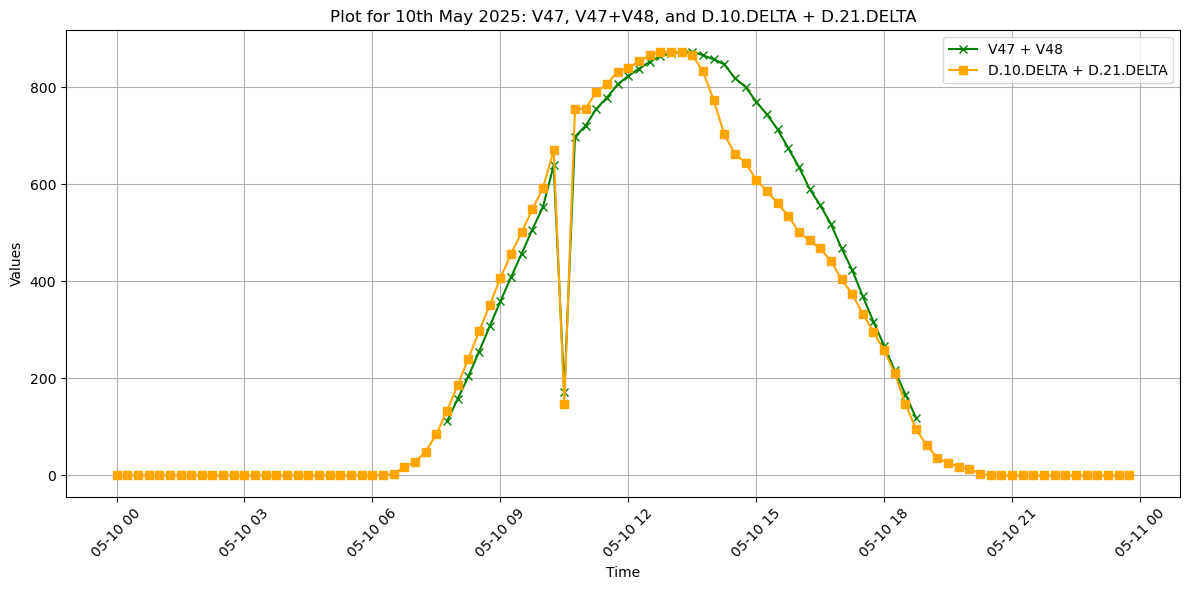

In [15]:
import matplotlib.pyplot as plt

# Ensure the required columns exist in the DataFrame
required_columns = ["V47", "V48", "D.10.DELTA", "D.21.DELTA"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame.")

# Ensure the DataFrame index is in datetime format
df.index = pd.to_datetime(df.index)

# Filter the DataFrame for 10th May
date_to_filter = "2025-05-10"
filtered_data = df.loc[df.index.strftime("%Y-%m-%d") == date_to_filter]

# Calculate the sums
filtered_data["V47+V48"] = filtered_data["V47"] + filtered_data["V48"]
filtered_data["6+17"] = filtered_data["6"] + filtered_data["17"]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data["V47+V48"], label="V47 + V48", color="green", marker="x")
plt.plot(filtered_data.index, filtered_data["6+17"], label="D.10.DELTA + D.21.DELTA", color="orange", marker="s")

# Add labels, title, and legend
plt.title(f"Plot for 10th May 2025: V47, V47+V48, and D.10.DELTA + D.21.DELTA")
plt.xlabel("Time")
plt.ylabel("Values")
plt.grid()
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

PLANT Active power: D.10.DELTA + D.21.DELTA (the sum of all inverters)
PLANT Expected power: V47 + V48 (calculated expected power for both inverters)


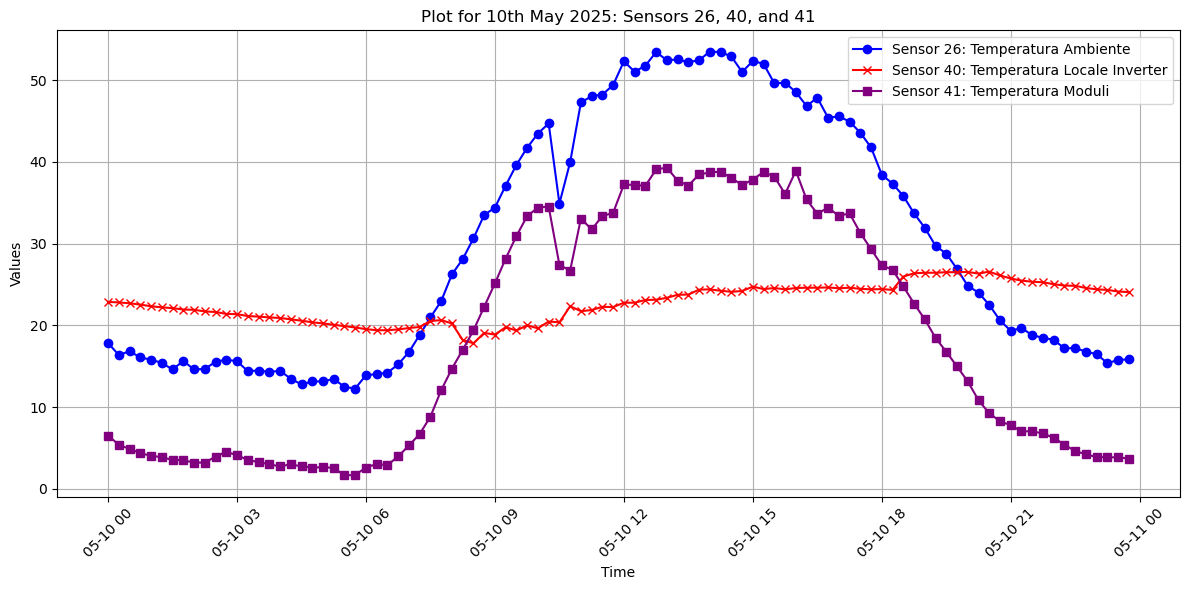

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the sensor names from the saved CSV file
sensor_data = pd.read_csv("Data/P708/P708_sensors_with_data.csv")

# Map sensor IDs to their names
sensor_mapping = dict(zip(sensor_data['id'].astype(str), sensor_data['name']))

# Ensure the required columns exist in the DataFrame
required_columns = ["26", "40", "41"]  # Adjusted column names to include sensors 26, 40, and 41
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame.")

# Ensure the DataFrame index is in datetime format
df.index = pd.to_datetime(df.index)

# Filter the DataFrame for 10th May and create a copy to avoid the warning
date_to_filter = "2025-05-10"
filtered_data = df.loc[df.index.strftime("%Y-%m-%d") == date_to_filter].copy()

# Plot the data for sensors 26, 40, and 41
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data["26"], label=f"Sensor 26: {sensor_mapping.get('26', 'Unknown')}", color="blue", marker="o")
plt.plot(filtered_data.index, filtered_data["40"], label=f"Sensor 40: {sensor_mapping.get('40', 'Unknown')}", color="red", marker="x")
plt.plot(filtered_data.index, filtered_data["41"], label=f"Sensor 41: {sensor_mapping.get('41', 'Unknown')}", color="purple", marker="s")

# Add labels, title, and legend
plt.title(f"Plot for 10th May 2025: Sensors 26, 40, and 41")
plt.xlabel("Time")
plt.ylabel("Values")
plt.grid()
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

# Load the sensor names from the saved CSV file
sensor_data = pd.read_csv("Data/P708/P708_sensors_with_data.csv")

# Map sensor IDs to their names
sensor_mapping = dict(zip(sensor_data['id'].astype(str), sensor_data['name']))

# Ensure the required columns exist in the DataFrame
if "PLANT Active Power" not in df.columns:
    # Create the 'PLANT Active Power' column if it doesn't exist
    df["PLANT Active Power"] = df["D.10.DELTA"] + df["D.21.DELTA"]

# Define a rolling window size (e.g., 24 for hourly data over a day)
rolling_window = 288

# Calculate rolling correlations of all features with 'PLANT Active Power'
rolling_correlations = df.rolling(window=rolling_window).corr(df["PLANT Active Power"])

# Extract the rolling correlations for all features except 'PLANT Active Power'
rolling_correlations = rolling_correlations.drop("PLANT Active Power", axis=1).iloc[rolling_window - 1:]

# Find the mean correlation over time for each feature
mean_correlations = rolling_correlations.mean()

# Create a DataFrame to include sensor names and mean correlations
correlation_with_names = pd.DataFrame({
    "Sensor ID": mean_correlations.index,
    "Mean Correlation": mean_correlations.values,
    "Sensor Name": [sensor_mapping.get(sensor_id, "Unknown") for sensor_id in mean_correlations.index]
})

# Sort by mean correlation values
correlation_with_names = correlation_with_names.sort_values(by="Mean Correlation", ascending=False)

# Display the mean correlation values with sensor names
print("Mean Correlation of Features with PLANT Active Power over Time:")
print(correlation_with_names.to_string(index=False))

Mean Correlation of Features with PLANT Active Power over Time:
  Sensor ID  Mean Correlation                       Sensor Name
 D.10.DELTA          0.999705                   Energy AC DELTA
 D.21.DELTA          0.999655                   Energy AC DELTA
    D.10.EH          0.999630    Ore equivalenti (da Energy AC)
    D.21.EH          0.999592    Ore equivalenti (da Energy AC)
          6          0.993887                   Active Power AC
   D.6.PERC          0.993887                 Active Power AC %
         17          0.993791                   Active Power AC
  D.17.PERC          0.993791                 Active Power AC %
         25          0.984126        Irraggiamento Piano Moduli
 D.25.ISIRR          0.984126  Irraggiamento Piano Moduli ISIRR
         26          0.894047              Temperatura Ambiente
D.25.STDDEV          0.497288 Irraggiamento Piano Moduli STDDEV
         10          0.013947                         Energy AC
         21          0.012470           

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [18]:
# Select the specified columns and display the first few rows
columns_to_display = ["V45", "D.21.DELTA", "D.10.DELTA","V46"]
print(df[columns_to_display].head(30))

                     V45  D.21.DELTA  D.10.DELTA  V46
timestamp                                            
2025-02-15 03:00:00  NaN         0.0         0.0  NaN
2025-02-15 03:15:00  NaN         0.0         0.0  NaN
2025-02-15 03:30:00  NaN         0.0         0.0  NaN
2025-02-15 03:45:00  NaN         0.0         0.0  NaN
2025-02-15 04:00:00  NaN         0.0         0.0  NaN
2025-02-15 04:15:00  NaN         0.0         0.0  NaN
2025-02-15 04:30:00  NaN         0.0         0.0  NaN
2025-02-15 04:45:00  NaN         0.0         0.0  NaN
2025-02-15 05:00:00  NaN         0.0         0.0  NaN
2025-02-15 05:15:00  NaN         0.0         0.0  NaN
2025-02-15 05:30:00  NaN         0.0         0.0  NaN
2025-02-15 05:45:00  NaN         0.0         0.0  NaN
2025-02-15 06:00:00  NaN         0.0         0.0  NaN
2025-02-15 06:15:00  NaN         0.0         0.0  NaN
2025-02-15 06:30:00  NaN         0.0         0.0  NaN
2025-02-15 06:45:00  NaN         0.0         0.0  NaN
2025-02-15 07:00:00  NaN    

In [19]:
df[["25","D.25.ISIRR","D.25.STDDEV"]]

,25,D.25.ISIRR,D.25.STDDEV
timestamp,,,
2025-02-15 03:00:00,2.857,0.714,0.000
2025-02-15 03:15:00,2.857,0.714,0.000
2025-02-15 03:30:00,2.857,0.714,0.000
2025-02-15 03:45:00,2.738,0.685,0.084
2025-02-15 04:00:00,2.679,0.670,0.146
...,...,...,...
2025-05-15 22:45:00,4.643,1.161,0.146
2025-05-15 23:00:00,4.464,1.116,0.386
2025-05-15 23:15:00,4.464,1.116,0.146


🔌 Energy and Power Sensors
Energy AC DELTA (e.g., D.10.DELTA, D.21.DELTA)
These sensors measure the incremental (delta) AC energy output from each inverter over a specific time interval. They help in tracking the energy production trends and detecting any anomalies in inverter performance.

Ore equivalenti (da Energy AC) (e.g., D.10.EH, D.21.EH)
Translated as "Equivalent Hours," these sensors calculate the equivalent full-load operating hours of each inverter. This metric is derived from the energy output and rated power, providing insights into the utilization and efficiency of the inverters.

Active Power AC (e.g., 6, 17)
These sensors monitor the real-time active power output (in watts) from each inverter. Active power represents the actual usable power being delivered to the grid.

Active Power AC % (e.g., D.6.PERC, D.17.PERC)
These sensors express the active power output as a percentage of the inverter's maximum capacity. They are useful for assessing the load and performance relative to the inverter's rated output.

☀️ Irradiance Sensors
Irraggiamento Piano Moduli (e.g., 25, D.25.ISIRR)
These sensors measure the solar irradiance (sunlight intensity) incident on the plane of the PV modules. Accurate irradiance measurements are essential for evaluating the performance ratio and efficiency of the solar panels.

Irraggiamento Piano Moduli STDDEV (e.g., D.25.STDDEV)
This sensor calculates the standard deviation of the irradiance measurements, indicating the variability of solar exposure due to factors like cloud cover.

🌡️ Temperature Sensors
Temperatura Moduli (e.g., 41)
This sensor monitors the temperature of the PV modules. Module temperature affects the efficiency and power output of solar panels; higher temperatures generally reduce efficiency.

Temperatura Ambiente (e.g., 26)
This sensor measures the ambient air temperature around the PV installation. Ambient temperature can influence both the module temperature and the performance of other system components.

Temperatura Locale Inverter (e.g., 40)
This sensor tracks the temperature in the vicinity of the inverter. Maintaining optimal inverter temperatures is crucial for reliable operation and longevity.

📊 Performance Metrics
Performance Ratio (e.g., V45, V46)
These metrics assess the overall performance of the PV system by comparing the actual energy output to the theoretical maximum possible under current conditions. A higher performance ratio indicates a more efficient system.

Expected Power AC (e.g., V47, V48)
These sensors estimate the expected AC power output based on current irradiance and temperature conditions. Comparing expected and actual outputs helps in identifying performance issues or system faults.



In [20]:
# Select the specified columns and display 3 entries
columns_to_display = ["D.10.DELTA", "D.21.DELTA", "6", "17"]
print(df[columns_to_display].head(30))

                     D.10.DELTA  D.21.DELTA       6      17
timestamp                                                  
2025-02-15 03:00:00         0.0         0.0   0.000   0.000
2025-02-15 03:15:00         0.0         0.0   0.000   0.000
2025-02-15 03:30:00         0.0         0.0   0.000   0.000
2025-02-15 03:45:00         0.0         0.0   0.000   0.000
2025-02-15 04:00:00         0.0         0.0   0.000   0.000
2025-02-15 04:15:00         0.0         0.0   0.000   0.000
2025-02-15 04:30:00         0.0         0.0   0.000   0.000
2025-02-15 04:45:00         0.0         0.0   0.000   0.000
2025-02-15 05:00:00         0.0         0.0   0.000   0.000
2025-02-15 05:15:00         0.0         0.0   0.000   0.000
2025-02-15 05:30:00         0.0         0.0   0.000   0.000
2025-02-15 05:45:00         0.0         0.0   0.000   0.000
2025-02-15 06:00:00         0.0         0.0   0.000   0.000
2025-02-15 06:15:00         0.0         0.0   0.000   0.000
2025-02-15 06:30:00         0.0         

In [21]:
df["Energy"]=df["D.10.DELTA"]+df["D.21.DELTA"]

In [22]:
df.isna().sum()

10                       2
17                       2
21                       2
25                       2
26                       2
40                       0
41                       0
6                        2
D.10.DELTA               2
D.10.EH                918
D.17.PERC                2
D.21.DELTA               2
D.21.EH                918
D.25.ISIRR               2
D.25.STDDEV              2
D.6.PERC                 2
V45                   5519
V46                   5519
V47                   5474
V48                   5474
PLANT Active Power       2
Energy                   2
dtype: int64

In [23]:
# Forward-fill missing values
df = df.fillna(method='ffill')

# Optionally, check if there are still any missing values
print("Remaining missing values in the DataFrame:")
print(df.isna().sum())

Remaining missing values in the DataFrame:
10                      0
17                      0
21                      0
25                      0
26                      0
40                      0
41                      0
6                       0
D.10.DELTA              0
D.10.EH               916
D.17.PERC               0
D.21.DELTA              0
D.21.EH               916
D.25.ISIRR              0
D.25.STDDEV             0
D.6.PERC                0
V45                    30
V46                    30
V47                    30
V48                    30
PLANT Active Power      0
Energy                  0
dtype: int64


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/2569757253.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [24]:
# Forward-fill missing values
df = df.fillna(method='bfill')

# Optionally, check if there are still any missing values
print("Remaining missing values in the DataFrame:")
print(df.isna().sum())

Remaining missing values in the DataFrame:
10                    0
17                    0
21                    0
25                    0
26                    0
40                    0
41                    0
6                     0
D.10.DELTA            0
D.10.EH               0
D.17.PERC             0
D.21.DELTA            0
D.21.EH               0
D.25.ISIRR            0
D.25.STDDEV           0
D.6.PERC              0
V45                   0
V46                   0
V47                   0
V48                   0
PLANT Active Power    0
Energy                0
dtype: int64


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/1824069279.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [25]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from datetime import timedelta
# import matplotlib.pyplot as plt

# # Ensure the DataFrame has a datetime index
# df.index = pd.to_datetime(df.index)

# # Define the target variable (e.g., 'PLANT Active Power')
# target = "PLANT Active Power"

# # Split the data into training and testing sets
# train = df.iloc[:-96]  # Use all but the last 96 intervals (1 day) for training
# test = df.iloc[-96:]   # Use the last 96 intervals (1 day) for testing

# # Define the SARIMAX model
# # (p, d, q) are the ARIMA parameters, and (P, D, Q, s) are the seasonal parameters
# model = SARIMAX(train[target], 
#                 order=(1, 1, 1),  # ARIMA parameters: p, d, q
#                 seasonal_order=(1, 1, 1, 96),  # Seasonal parameters: P, D, Q, s (s=96 for daily seasonality)
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)

# # Fit the model
# sarimax_result = model.fit(disp=False)

# # Print the model summary
# print(sarimax_result.summary())

# # Forecast the next day's values (96 intervals for 15-minute resolution)
# forecast_steps = 96  # Number of steps to forecast (1 day = 96 intervals)
# forecast = sarimax_result.forecast(steps=forecast_steps)

# # Display the forecast
# print("Forecast for the next day:")
# print(forecast)

# # Plot the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(train[target], label="Training Data")
# plt.plot(test[target], label="Actual Data", color="orange")
# plt.plot(forecast, label="Forecast", color="green")
# plt.legend()
# plt.title("SARIMAX Forecast for 15-Minute Resolution Data")
# plt.show()

In [26]:
# Ensure the DataFrame index is a datetime index
df.index = pd.to_datetime(df.index)

# Define the date range
start_date = "2025-04-15"
end_date = "2025-05-15"

# Filter the DataFrame for the specified date range
df = df.loc[start_date:end_date]

# Display the filtered DataFrame
print(df)

                            10   17         21     25      26      40      41  \
timestamp                                                                       
2025-04-15 00:00:00  4835394.5  0.0  5202859.0  4.167  23.300  20.833  12.733   
2025-04-15 00:15:00  4835394.5  0.0  5202859.0  4.524  22.367  20.800  12.433   
2025-04-15 00:30:00  4835394.5  0.0  5202859.0  4.405  22.733  20.733  12.533   
2025-04-15 00:45:00  4835394.5  0.0  5202859.0  4.464  23.033  20.700  12.900   
2025-04-15 01:00:00  4835394.5  0.0  5202859.0  4.226  23.100  20.633  13.067   
...                        ...  ...        ...    ...     ...     ...     ...   
2025-05-15 22:45:00  4907316.5  0.0  5268645.5  4.643  21.100  23.600  10.833   
2025-05-15 23:00:00  4907316.5  0.0  5268645.5  4.464  21.333  23.533  10.667   
2025-05-15 23:15:00  4907316.5  0.0  5268645.5  4.464  20.733  23.400  10.400   
2025-05-15 23:30:00  4907316.5  0.0  5268645.5  4.762  20.700  23.300  10.200   
2025-05-15 23:45:00  4907316

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/3625933452.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_exog = train_exog.fillna(method="ffill").fillna(method="bfill")  # Forward and backward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_22522/3625933452.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_exog = test_exog.fillna(method="ffill").fillna(method="bfill")    # Forward and backward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             Energy   No. Observations:                 2688
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 96)   Log Likelihood               -8838.523
Date:                            Sat, 17 May 2025   AIC                          17691.047
Time:                                    19:28:23   BIC                          17731.795
Sample:                                04-15-2025   HQIC                         17705.842
                                     - 05-12-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
25             0.1001      0.002     62.663      0.000       0.097       0.103
26             2.4630      0.064   

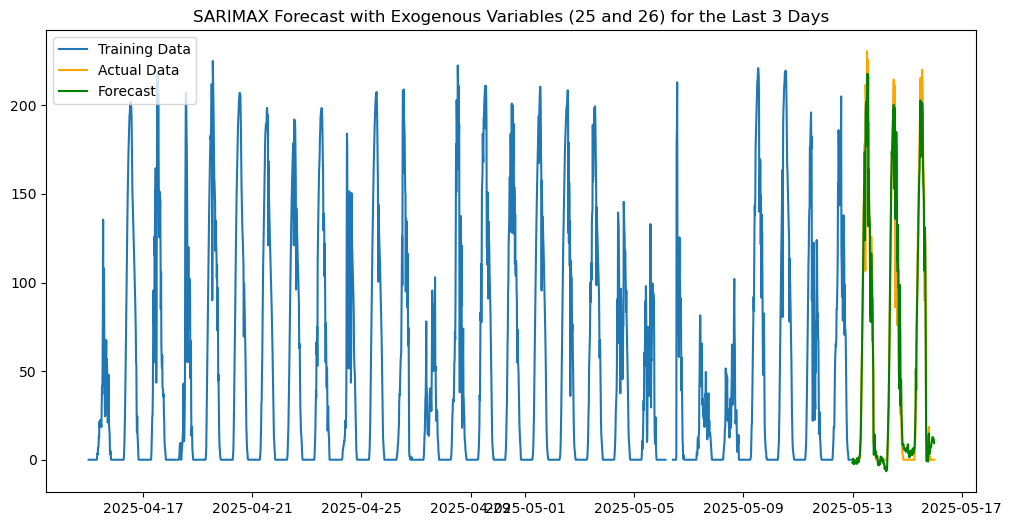

In [29]:
# Ensure the DataFrame has a datetime index with a proper frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq("15min")  # Set the frequency to 15 minutes

# Define the target variable (e.g., 'Energy')
target = "Energy"

# Define the exogenous variables (25 and 26)
exog_variables = ["25", "26"]

# Split the data into training and testing sets
train = df.iloc[:-288]  # Use all but the last 3 days (288 intervals) for training
test = df.iloc[-288:]   # Use the last 3 days (288 intervals) for testing

# Split the exogenous variables into training and testing sets
train_exog = train[exog_variables]
test_exog = test[exog_variables]

# Handle missing or invalid values in exogenous variables
train_exog = train_exog.fillna(method="ffill").fillna(method="bfill")  # Forward and backward fill missing values
test_exog = test_exog.fillna(method="ffill").fillna(method="bfill")    # Forward and backward fill missing values

# Define the SARIMAX model with exogenous variables
model = SARIMAX(train[target], 
                exog=train_exog,  # Include exogenous variables
                order=(1, 1, 1),  # ARIMA parameters: p, d, q
                seasonal_order=(1, 1, 1, 96),  # Seasonal parameters: P, D, Q, s (s=96 for daily seasonality)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarimax_result = model.fit(disp=False)

# Print the model summary
print(sarimax_result.summary())

# Forecast the next 3 days' values (288 intervals for 15-minute resolution)
forecast_steps = 288  # Number of steps to forecast (3 days = 288 intervals)
forecast_exog = test_exog.iloc[:forecast_steps]  # Ensure exogenous variables match the forecast steps
forecast = sarimax_result.forecast(steps=forecast_steps, exog=forecast_exog)

# Combine the forecast with the test set
forecast_index = test.index[:forecast_steps]  # Use the same index as the test set
forecast_df = pd.DataFrame({"Forecast": forecast}, index=forecast_index)  # Create a DataFrame for the forecast
combined_df = pd.concat([df, forecast_df], axis=1)  # Combine with original DataFrame

# Calculate accuracy metrics
actual = test[target].iloc[:forecast_steps]  # Actual values from the test set
mae = mean_absolute_error(actual, forecast)  # Mean Absolute Error
mse = mean_squared_error(actual, forecast)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Display accuracy metrics
print("\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display the combined DataFrame
print("\nCombined DataFrame with Forecast:")
print(combined_df.tail(10))  # Show the last 10 rows for verification

# Plot the forecast alongside the actual data
plt.figure(figsize=(12, 6))
plt.plot(train[target], label="Training Data")
plt.plot(test[target], label="Actual Data", color="orange")
plt.plot(forecast_df["Forecast"], label="Forecast", color="green")
plt.legend()
plt.title("SARIMAX Forecast with Exogenous Variables (25 and 26) for the Last 3 Days")
plt.show()

Needs to know the open and close times.

In [30]:
df

,10,17,21,25,26,40,41,6,D.10.DELTA,D.10.EH,...,D.21.EH,D.25.ISIRR,D.25.STDDEV,D.6.PERC,V45,V46,V47,V48,PLANT Active Power,Energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-04-15 00:00:00,4835394.5,0.0,5202859.0,4.167,23.300,20.833,12.733,0.0,0.0,0.0,...,0.0,1.042,0.367,0.0,91.108,85.994,50.444,48.227,0.0,0.0
2025-04-15 00:15:00,4835394.5,0.0,5202859.0,4.524,22.367,20.800,12.433,0.0,0.0,0.0,...,0.0,1.131,0.168,0.0,91.108,85.994,50.444,48.227,0.0,0.0
2025-04-15 00:30:00,4835394.5,0.0,5202859.0,4.405,22.733,20.733,12.533,0.0,0.0,0.0,...,0.0,1.101,0.168,0.0,91.108,85.994,50.444,48.227,0.0,0.0
2025-04-15 00:45:00,4835394.5,0.0,5202859.0,4.464,23.033,20.700,12.900,0.0,0.0,0.0,...,0.0,1.116,0.146,0.0,91.108,85.994,50.444,48.227,0.0,0.0
2025-04-15 01:00:00,4835394.5,0.0,5202859.0,4.226,23.100,20.633,13.067,0.0,0.0,0.0,...,0.0,1.057,0.168,0.0,91.108,85.994,50.444,48.227,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15 22:45:00,4907316.5,0.0,5268645.5,4.643,21.100,23.600,10.833,0.0,0.0,0.0,...,0.0,1.161,0.146,0.0,82.793,82.951,45.777,43.765,0.0,0.0
2025-05-15 23:00:00,4907316.5,0.0,5268645.5,4.464,21.333,23.533,10.667,0.0,0.0,0.0,...,0.0,1.116,0.386,0.0,82.793,82.951,45.777,43.765,0.0,0.0
2025-05-15 23:15:00,4907316.5,0.0,5268645.5,4.464,20.733,23.400,10.400,0.0,0.0,0.0,...,0.0,1.116,0.146,0.0,82.793,82.951,45.777,43.765,0.0,0.0
